<a href="https://colab.research.google.com/github/Mmotaharinia/Fundamentals_of_data_analysis/blob/main/SPY_price_action_(10_days_prediction_strategy)_Three_layered_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

from IPython.display import clear_output

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [ ]:
# Load data
#spy
data_spy=np.genfromtxt("spy.csv",delimiter=',',skip_header=1)
#number of first columns to be deleted
a=np.arange(0,13,1)
data_spy=np.delete(data_spy,a,axis=1)
b=np.arange(0,92,1)
data_spy=np.delete(data_spy,b,axis=0)
data_spy=data_spy.T
Y_data_spy=data_spy[-1,:]
Y_data_spy=np.array([Y_data_spy])
#Y_data_spy=(Y_data_spy-1)*-1
X_data_spy=data_spy[2:10,:]
#separate train from test
X_train_spy=X_data_spy[:,:2200]
Y_train_spy=Y_data_spy[:,:2200]
X_test_spy=X_data_spy[:,2200:]
Y_test_spy=Y_data_spy[:,2200:]
pd.DataFrame(X_train_spy)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199
0,0.01,0.75,0.01,0.01,0.01,0.75,0.01,0.01,0.75,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.75,2.00,0.75,0.01,2.00,0.75,0.01,0.01,0.01,0.01,0.75,0.75,0.75,2.00,0.75,0.75,0.01,0.75,0.01,0.01,0.01,0.01,0.01,0.75,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.75,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.75,0.01,0.01,0.75,0.75,0.75,0.01,0.75,2.00,2.00,0.75,2.00,0.75,0.01,0.01,0.01,0.01,0.01,0.75,0.01,0.01,0.75,0.01,0.01
1,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,...,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
2,0.01,0.01,0.75,0.01,0.01,0.01,-0.75,0.01,0.01,0.75,0.01,0.75,0.01,0.01,-0.75,-2.00,0.01,0.01,-0.75,0.75,0.75,0.75,0.01,0.01,-0.75,0.01,-0.75,-0.75,-0.75,0.01,0.01,0.01,0.75,0.75,0.01,0.01,0.01,-0.75,0.01,0.75,...,-0.75,-0.75,0.75,0.75,0.01,-2.00,-0.75,0.01,0.75,0.75,0.01,0.75,0.01,-0.75,-2.00,-0.75,-0.75,-2.00,-2.00,-0.75,0.01,-0.75,0.01,-0.75,-0.75,-0.75,0.01,0.75,0.01,0.75,0.01,0.01,2.00,0.75,-0.75,0.01,0.01,-0.75,-2.00,-0.75
3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.75,0.01,0.01,0.75,0.01,0.01,0.01,0.01,0.01,-2.00,0.01,0.75,-0.75,0.01,0.75,0.01,0.01,0.75,-0.75,0.01,0.01,0.01,-0.75,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.75,-0.75,0.01,...,0.01,-0.75,-0.75,0.01,0.75,0.01,-2.00,-0.75,0.01,0.75,0.01,0.01,0.75,0.01,0.01,-0.75,0.01,0.01,-0.75,-0.75,-0.75,0.75,-0.75,0.75,-0.75,0.01,-0.75,-0.75,0.75,-0.75,0.75,0.01,-0.75,0.75,0.75,-0.75,0.01,0.75,0.01,-0.75
4,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.75,0.01,0.01,0.01,0.01,0.01,0.75,0.75,0.01,-0.75,0.01,0.01,-0.75,0.01,0.01,0.01,0.01,0.75,0.01,0.75,0.01,0.01,-0.75,0.01,0.01,-0.75,0.01,0.01,0.01,0.75,0.75,-0.75,...,0.01,0.75,-0.75,-0.75,0.01,2.00,0.75,-0.75,-0.75,0.01,0.75,0.01,0.01,0.75,0.75,0.01,0.01,0.75,0.75,0.01,-0.75,0.01,0.75,-0.75,0.75,0.01,0.01,-0.75,-0.75,0.75,-0.75,0.75,-0.75,-0.75,0.75,0.75,-0.75,0.75,2.00,0.01
5,0.01,0.01,-0.75,0.01,-0.75,0.01,0.01,0.01,0.01,-0.75,-0.75,-0.75,0.01,0.01,0.75,0.75,0.75,0.75,-0.75,0.01,0.01,-2.00,0.01,0.01,0.01,0.01,0.75,0.01,0.75,0.01,0.01,-0.75,0.01,-0.75,-0.75,0.01,0.01,0.01,0.75,0.01,...,0.75,0.75,0.75,-2.00,-0.75,0.75,2.00,0.75,-2.00,-0.75,-0.75,0.01,0.01,0.01,2.00,0.75,0.75,0.75,2.00,2.00,0.01,0.01,0.01,2.00,0.01,2.00,0.01,0.01,-0.75,-0.75,0.75,-0.75,0.01,-2.00,-0.75,0.75,0.75,0.01,0.75,2.00
6,-0.75,0.01,-0.75,-0.75,0.01,-0.75,0.01,0.01,0.01,0.01,-0.75,-0.75,-0.75,0.01,0.01,0.75,2.00,2.00,0.75,-0.75,0.01,-0.75,-2.00,-0.75,0.01,0.75,0.75,2.00,0.75,0.75,0.01,0.01,-2.00,-0.75,-0.75,-0.75,-0.75,0.01,0.01,0.01,...,2.00,0.75,0.75,0.01,-2.00,-0.75,0.75,2.00,0.75,-2.00,-2.00,-0.75,0.01,0.01,0.75,2.00,2.00,2.00,2.00,2.00,2.00,0.75,0.01,0.75,2.00,0.01,2.00,0.01,0.01,-2.00,-0.75,0.75,-0.75,-0.75,-2.00,-0.75,0.75,2.00,0.75,2.00
7,0.01,-0.75,0.01,-0.75,-0.75,-0.75,0.01,0.01,0.01,0.01,0.01,-0.75,-0.75,-0.75,0.01,0.75,2.00,2.00,2.00,0.75,-2.00,-0.75,-0.75,-2.00,0.01,0.01,0.75,0.75,2.00,0.75,0.75,0.01,-0.75,-2.00,-0.75,-0.75,-0.75,0.01,0.01,0.01,...,2.00,2.00,0.75,0.01,0.01,-0.75,0.01,0.75,2.00,0.01,-2.00,-2.00,-0.75,0.01,0.75,0.75,2.00,2.00,2.00,2.00,2.00,2.00,0.75,0.75,0.75,2.00,0.75,2.00,0.01,0.01,-2.00,-0.75,0.01,-2.00,-0.75,-2.00,-0.75,2.00,2.00,0.75


In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.05, num_iterations = 100000, print_cost=False):

    np.random.seed(1)
    costs = []                        
    wins=[]
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        pred_test = predict(X_test_spy, Y_test_spy, parameters)
        r1=np.array(pred_test)
        r2=np.array(Y_test_spy)
        win=np.sum(np.multiply(r1,r2))/np.sum(r1)

        #if print_cost and i % 100 == 0:
            #print ("Cost after iteration %i: %f" % (i, win))
        if print_cost and i % 100 == 0:
            wins.append(win)
            costs.append(cost)
            # plot the cost
            clear_output(wait=True)
            plt.subplot(1,2,1)
            plt.plot(np.squeeze(wins))
            plt.ylabel('win')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
            plt.subplot(1,2,2)
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            #plt.show()
        # Print the cost every 100 training example
        #if print_cost and i % 100 == 0:
            #print ("Cost after iteration %i: %f" % (i, cost))
        #if print_cost and i % 100 == 0:
            #costs.append(cost)
            # plot the cost
            #clear_output(wait=True)
            #plt.plot(np.squeeze(costs))
            #plt.ylabel('cost')
            #plt.xlabel('iterations (per tens)')
            #plt.title("Learning rate =" + str(learning_rate))
            #plt.show()
            
    
    return parameters, costs

In [ ]:
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.6:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    #print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

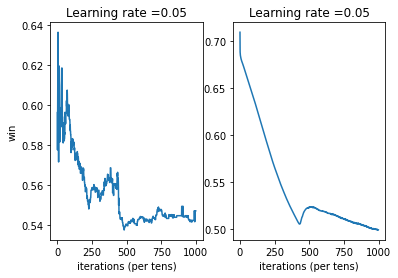

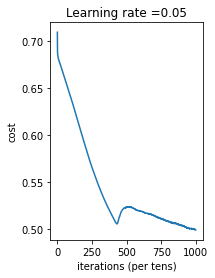

In [ ]:
layers_dims = [8,128, 1] #  5-layer model
parameters, costs = L_layer_model(X_train_spy, Y_train_spy, layers_dims, num_iterations = 100000, print_cost = True)

In [ ]:
pred_train = predict(X_train_spy, Y_train_spy, parameters)
pred_test = predict(X_test_spy, Y_test_spy, parameters)

In [ ]:
pred_test = predict(X_test_spy, Y_test_spy, parameters)
r1=np.array(pred_test)
r2=np.array(Y_test_spy)
#r3=pd.concat([r1,r2],axis=0)
#r3
win=np.sum(np.multiply(r1,r2))/np.sum(r1)
win
#pd.DataFrame(r1)
#pd.DataFrame(r2)

0.5773809523809523

In [ ]:
pd.DataFrame(r1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:


#Activation Functions
def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def initialize_parameters_deep(layer_dims):
   
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)          

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters


#Forward propagation with three functions:

def linear_forward(A, W, b):
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    linear_cache = (A, W, b) #what
    
    return Z, linear_cache

# Define the activation function to be used #activation cache is z and linear cache is inputs(A,w,b)
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)     
    assert(cost.shape == ())
    
    return cost


#Backward Propagation
def sigmoid_backward(dA, cache):    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ



def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db


def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
   
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters